In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("combined_data.csv")

In [3]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


**Checking if there is any null values present in the data set**



In [5]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [6]:
df.describe()

,label
count,83448.000000
mean,0.526196
std,0.499316
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [8]:
df["label"].value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

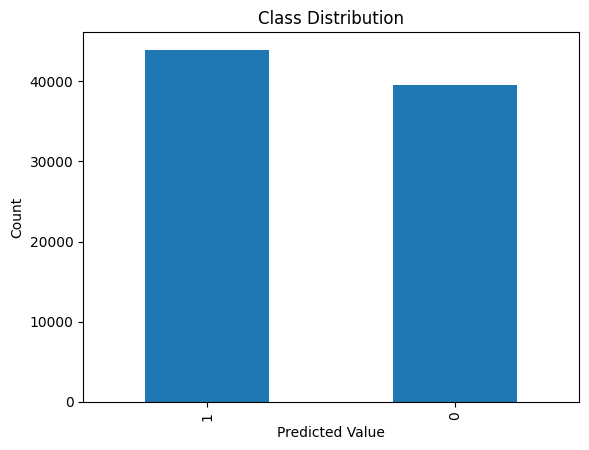

In [10]:
df['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Predicted Value')
plt.ylabel('Count')
plt.show()

In [11]:
class_weight = compute_class_weight(class_weight = "balanced",
                                    classes = np.unique(df['label']),
                                    y = df['label'])

print(class_weight)

[1.05528858 0.95021635]


**Removing Special characters**

In [12]:
df['text'] = df['text'].apply(lambda text : re.sub(r'[^a-zA-Z0-9\s]',' ',text))

In [13]:
sample_emails = df['text'].sample(n=50, random_state=42)
print(sample_emails)

67681    accuweather escapenumber day forecast for beve...
61385    dear in christ the time has come for christian...
41829    hallway cosponsor pry reimbursable coat clumsy...
29172    does size matter  escapenumber of women said t...
35274    along zeng wrote hi all is there levene  test ...
6695     i m about eighty percent sure chuckwalla anemo...
41685    dear reader  \nwe are writing you on behalf of...
13023    hi kedda you ve just received a postcard to vi...
62253     escapenumber escapenumber escapenumber home u...
38356    on sat may escapenumber escapenumber at escape...
81963     dvly update issued  speculative buy  rating h...
13977    your credit history does not matter to us if y...
71006    start raise some was wonderful exclaimed impos...
82435     using tomcat but need to do more need to supp...
60468    hello   i am angelique\nyoungest schoolgirls n...
23601    we have the best medications around http www x...
3057     make use of your chance   anatrim   the up to .

In [14]:
df['text'] = df['text'] = df['text'].apply(lambda x: x.lower())

In [15]:
X = df['text']
y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

print("Training set class distribution:\n", y_train.value_counts())
print("Test set class distribution:\n", y_test.value_counts())

print("\nSplit ratio verification:")
print("Training set ratio:", len(X_train)/len(X))
print("Testing set ratio:", len(X_test)/len(X))

Training set size: 66758
Test set size: 16690
Training set class distribution:
 label
1    35128
0    31630
Name: count, dtype: int64
Test set class distribution:
 label
1    8782
0    7908
Name: count, dtype: int64

Split ratio verification:
Training set ratio: 0.7999952065957243
Testing set ratio: 0.2000047934042757


In [17]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

X_test = vectorizer.transform(X_test)

In [18]:
nb_classifier = MultinomialNB(alpha=0.1)
logreg = LogisticRegression(max_iter=10000)
svm = SVC(kernel='linear', probability=True)

In [ ]:
nb_classifier.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)

In [ ]:
y_pred = nb_classifier.predict(X_test)
print(y_pred)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy:.3f}")

log_accuracy = logreg.score(X_val, y_val)
print(f"Logistic Regression Accuracy: {log_accuracy:.3f}")

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)


conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_normalized = conf_mat / conf_mat.sum(axis=1, keepdims=True)


print("Confusion Matrix:")
print(conf_mat_normalized)

In [344]:
import joblib
joblib.dump(nb_classifier, "spam_classifier.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


clf = joblib.load("spam_classifier.pkl")
vectorizer = joblib.load("vectorizer.pkl")

In [ ]:
user_text = input("Enter a message to check if it's spam or not: ")
text_transformed = vectorizer.transform([user_text])
prediction = clf.predict(text_transformed)[0]

if prediction == 1:
    print("🔴 Spam Message!")
else:
    print("✅ Not Spam.")